In [1]:
from environment import Environment
from models.baseline import BaselineModel
from models.baseline2 import BaselineModel2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data/train_preprocessed.csv')
test_data = pd.read_csv('data/validate_preprocessed.csv')

In [48]:
def print_func(battery, prices, actions, rewards):
    '''for i in range(len(battery)):
        print('t=%d, battery=%.2f, price=%.2f, action=%d, rewards=%.2f'%(i, battery[i], prices[i], actions[i], rewards[i]))
    '''
    
    print('total reward = ', sum(rewards))
    
    '''for i in range(len(battery)):
        if actions[i] != 25:
            hour = i%24
            print('t=%d, hour=%d battery=%.2f, price=%.2f, action=%d, rewards=%.2f'%(i, hour, battery[i], prices[i], actions[i], rewards[i]))
    '''
    
    return

def plot_func(battery, prices, actions, rewards):
    x = range(len(battery))
    
    charging = np.insert(np.diff(battery), 0, 0)
    cum_rewards = np.cumsum(np.array(rewards))
    
    fig, axis = plt.subplots(2,3, figsize=(12,8))
    for ax, val, name in zip(axis.flat, 
                             [battery, charging, prices, actions, rewards, cum_rewards],
                               ['Battery', 'Charging', 'Prices', 'Actions', 'Rewards', 'Cumulative rewards']):
        ax.scatter(x, val, s=1)
        ax.set_title(name)
    plt.show()
    
    
    plt.figure(figsize=(12, 6))
    col = np.where(np.array(actions)>25,'red',np.where(np.array(actions)<25, 'green', '#FF000000'))
    plt.ylim(0, 300)
    plt.xlim(0, 1200)
    plt.scatter(x, prices, c = col,s = 40, zorder=1)
    plt.plot(x, prices, zorder =0, alpha=0.8)
    upper_line = np.full(shape=len(battery), fill_value=104.67949999999989, dtype=np.float64)
    lower_line = np.full(shape=len(battery), fill_value=39.99, dtype=np.float64)
    plt.plot(x, upper_line, c= "green", alpha=0.5)
    plt.plot(x, lower_line, c= "red", alpha=0.5, zorder=1)
    plt.ylabel('Price in Euro')
    plt.xlabel('Time')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(x, cum_rewards)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Reward in Euro')

    return


In [4]:
def learn(env, model, t_max):
    rewards, battery, revenues, actions, prices = [], [], [], [], []
    i=0
    obs, reward = env.reset()
    
    while i<t_max:
        action = model.predict(obs)
        battery.append(obs['battery'])
        prices.append(obs['price'])
        
        obs, reward, finished = env.step(action)
        
        actions.append(action)
        rewards.append(reward)
        i+=1
    
    return battery, prices, actions, rewards

In [7]:
min_thres = [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
max_thres = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


Rewards = []
for Min in min_thres:
    for Max in max_thres:
            env = Environment(test_data)
            model = BaselineModel(data, Min, Max)
            t_max = len(test_data)-1
            battery, prices, actions, rewards = learn(env, model, t_max)
            Rewards.append([sum(rewards), Min, Max])
            

            #print_func(battery, prices, actions, rewards)
            #plot_func(battery, prices, actions, rewards)
            
    max_idx = np.argmax(np.array(Rewards)[:,0])
    print(Rewards[max_idx])

[-733579.7111111111, 0.05, 0.95]
[-684792.0123456786, 0.1, 0.95]
[-672084.5160493825, 0.15, 0.95]
[-658451.7382716046, 0.2, 0.95]
[-649714.4820987651, 0.25, 0.95]
[-642492.5753086418, 0.3, 0.95]
[-642492.5753086418, 0.3, 0.95]
[-642492.5753086418, 0.3, 0.95]
[-567041.9098765426, 0.45, 0.95]


104.67949999999989 39.99


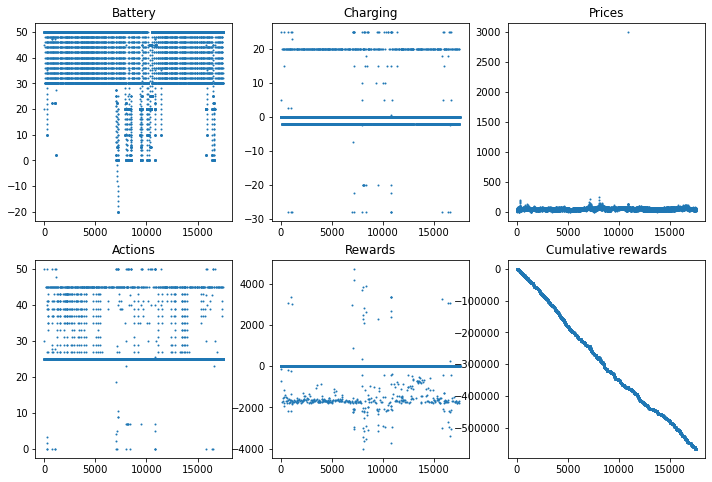

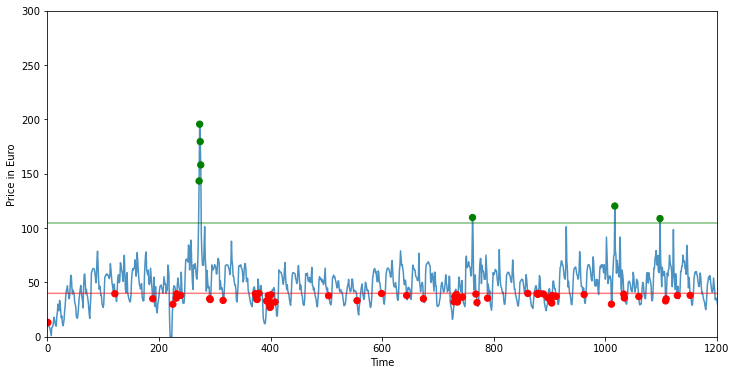

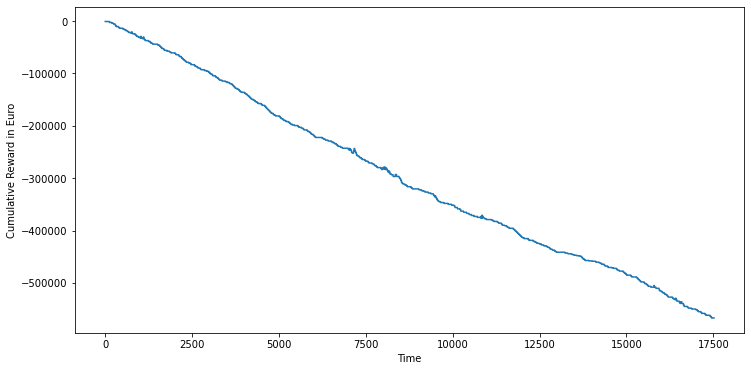

In [49]:
env = Environment(test_data)
model = BaselineModel(data, 0.45, 0.95)
t_max = len(test_data)-1
battery, prices, actions, rewards = learn(env, model, t_max)
print(model.higher_thres, model.lower_thres)
plot_func(battery, prices, actions, rewards)

In [8]:
env = Environment(test_data)
model = BaselineModel2(data)
t_max = len(test_data) - 1
battery, prices, actions, rewards = learn(env, model, t_max)
print(sum(rewards))

-779567.9999999995
